In [1]:
# data manipulation libraries
import numpy as np
import pandas as pd
from ast import literal_eval
from sklearn.model_selection import train_test_split

# pyspark
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.sql import types, functions as F

# random seed for reproducibility
RANDOM_SEED = 15

import shap
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
from sklearn.model_selection import RepeatedKFold
plt.style.use('seaborn-white')

app_name = 'poi-reseller'
conf = (SparkConf()
        .setMaster("yarn-client")
        .setAppName(app_name)
        .set("spark.executor.memory", "8g")
        .set("spark.executor.instances", "1")
        .set("spark.executor.cores", "4")
        .set("spark.driver.memory", "8g")
        .set("spark.yarn.queue", "root.hue_dmp")
        .set("spark.default.parallelism", "8")
        .set("spark.sql.shuffle.partitions", "1000")
        .set("spark.shuffle.service.enabled", "true")
        .set("spark.dynamicAllocation.enabled", "true")
        .set("spark.yarn.driver.memoryOverhead", "4096")
        .set("spark.yarn.executor.memoryOverhead", "4096")
        .set("spark.kryoserializer.buffer.max", "1g")
        .set("spark.dynamicAllocation.minExecutors", "1")
        .set("spark.dynamicAllocation.maxExecutors", "20")
        .set("spark.driver.maxResultSize", "4g")
        .set("spark.sql.crossJoin.enabled", "true")
        .set("spark.hadoop.fs.permissions.umask-mode", "002")
        .set("spark.sql.autoBroadcastJoinThreshold", "-1")
        .set("spark.dynamicAllocation.initialExecutors", "1"))
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession(sc)
spark


Bad key backend.qt4 in file /etc/matplotlib/matplotlibrc, line 43 ('backend.qt4 : PyQt4        # PyQt4 | PySide')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution


In [1]:
# data manipulation libraries
import numpy as np
import pandas as pd
from ast import literal_eval
from sklearn.model_selection import train_test_split

# pyspark
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.sql import types, functions as F

# random seed for reproducibility
RANDOM_SEED = 15

import shap
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
from sklearn.model_selection import RepeatedKFold
plt.style.use('seaborn-white')

app_name = 'nat-geohash'
conf = (SparkConf()
        .setMaster("yarn-client")
        .setAppName(app_name)
        .set("spark.driver.maxResultSize", "10g")
        .set("spark.driver.memory", "16g")
        .set("spark.driver.memoryOverhead", "4096")
        .set("spark.dynamicAllocation.enabled", "true")
        .set("spark.dynamicAllocation.initialExecutors", "1")
        .set("spark.dynamicAllocation.maxExecutors", "75")
        .set("spark.dynamicAllocation.minExecutors", "1")
        .set("spark.executor.cores", "8")
        .set("spark.executor.memory", "40G")
        .set("spark.hadoop.fs.permissions.umask-mode", "002")
        .set("spark.kryoserializer.buffer.max", "512m")
        .set("spark.shuffle.service.enabled", "true")
        .set("spark.sql.broadcastTimeout", "1000")
        .set("spark.sql.hive.convertMetastoreParquet", "false")
        .set("spark.sql.parquet.compression.codec", "snappy")
        .set("spark.sql.shuffle.partitions", "1000")
        .set("spark.sql.sources.partitionOverwriteMode", "dynamic")
        .set("spark.yarn.driver.memoryOverhead", "4096")
        .set("spark.yarn.executor.memoryOverhead", "8G")
        .set("spark.yarn.maxAppAttempts", "2")
        .set("spark.yarn.queue", "root.hue_dmp")
        .set("yarn.nodemanager.vmem-check-enabled", "false")
        .set("hive.exec.dynamic.partition", "true")
        .set("hive.exec.dynamic.partition.mode", "nonstrict")
        .set("hive.exec.max.dynamic.partitions", "2048")
        )
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession(sc)
spark


Bad key backend.qt4 in file /etc/matplotlib/matplotlibrc, line 43 ('backend.qt4 : PyQt4        # PyQt4 | PySide')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution


In [77]:
df1 = spark.read.table('dbi.sample_site_for_outlet_v2')
df1 = df1.toPandas()
df1.columns

Index(['site_id', 'fea_min_distance_outlet_to_leisure_and_outdoor',
       'fea_min_distance_outlet_to_areas_and_buildings',
       'fea_min_distance_outlet_to_shopping',
       'fea_min_distance_outlet_to_going_out_entertainment',
       'fea_min_distance_outlet_to_sights_and_museums',
       'fea_min_distance_outlet_to_facilities',
       'fea_min_distance_outlet_to_accommodation',
       'fea_min_distance_outlet_to_natural_and_geographical',
       'fea_min_distance_outlet_to_business_and_services',
       'fea_min_distance_outlet_to_transport',
       'fea_min_distance_outlet_to_eat_and_drink',
       'fea_outlet_under_100m_to_leisure_and_outdoor',
       'fea_outlet_under_250m_to_leisure_and_outdoor',
       'fea_outlet_under_500m_to_leisure_and_outdoor',
       'fea_outlet_under_1000m_to_leisure_and_outdoor',
       'fea_outlet_under_100m_to_areas_and_buildings',
       'fea_outlet_under_250m_to_areas_and_buildings',
       'fea_outlet_under_500m_to_areas_and_buildings',
       '

In [2]:
#Spark Reead : for Aggregation :

pd.options.display.max_columns = None
pd.options.display.max_rows = None

df_100m = spark.sql("""select 
                        b.kecamatan,
                        sum(b.subs_4g) as subs_4g,
                        sum(b.fea_outlet_under_100m_to_leisure_and_outdoor) fea_outlet_under_100m_to_leisure_and_outdoor,
                        sum(b.fea_outlet_under_100m_to_areas_and_buildings) fea_outlet_under_100m_to_areas_and_buildings,
                        sum(b.fea_outlet_under_100m_to_shopping) fea_outlet_under_100m_to_shopping,
                        sum(b.fea_outlet_under_100m_to_going_out_entertainment) fea_outlet_under_100m_to_going_out_entertainment,
                        sum(b.fea_outlet_under_100m_to_sights_and_museums) fea_outlet_under_100m_to_sights_and_museums,
                        sum(b.fea_outlet_under_100m_to_facilities) fea_outlet_under_100m_to_facilities,
                        sum(b.fea_outlet_under_100m_to_accommodation) fea_outlet_under_100m_to_accommodation,
                        sum(b.fea_outlet_under_100m_to_natural_and_geographical) fea_outlet_under_100m_to_natural_and_geographical,
                        sum(b.fea_outlet_under_100m_to_business_and_services) fea_outlet_under_100m_to_business_and_services,
                        sum(b.fea_outlet_under_100m_to_transport) fea_outlet_under_100m_to_transport,            
                        sum(b.fea_outlet_under_100m_to_eat_and_drink) fea_outlet_under_100m_to_eat_and_drink
                    from
                        dbi.sample_site_for_outlet_v2 b 
                    where 
                        b.subs_4g > 100
                     group by kecamatan
""").toPandas()
df_100m.head()

,kecamatan,subs_4g,fea_outlet_under_100m_to_leisure_and_outdoor,fea_outlet_under_100m_to_areas_and_buildings,fea_outlet_under_100m_to_shopping,fea_outlet_under_100m_to_going_out_entertainment,fea_outlet_under_100m_to_sights_and_museums,fea_outlet_under_100m_to_facilities,fea_outlet_under_100m_to_accommodation,fea_outlet_under_100m_to_natural_and_geographical,fea_outlet_under_100m_to_business_and_services,fea_outlet_under_100m_to_transport,fea_outlet_under_100m_to_eat_and_drink
0,LONGKIB,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BAITURRAHMAN,13028.0,4.0,1.0,466.0,5.0,39.0,110.0,11.0,0.0,160.0,4.0,73.0
2,TANJUNGANOM,6384.0,0.0,0.0,43.0,0.0,1.0,12.0,0.0,0.0,13.0,0.0,12.0
3,PADANG UTARA,24350.0,3.0,5.0,251.0,8.0,20.0,136.0,12.0,0.0,157.0,8.0,163.0
4,AMBARAWA,6697.0,1.0,0.0,45.0,1.0,7.0,22.0,0.0,0.0,28.0,0.0,28.0


In [31]:
iudf = spark.sql("""select 
                        b.kecamatan,
                        sum(b.subs_4g) as subs_4g,
                        sum(b.fea_outlet_under_100m_to_leisure_and_outdoor) fea_outlet_under_100m_to_leisure_and_outdoor,
                        sum(b.fea_outlet_under_100m_to_areas_and_buildings) fea_outlet_under_100m_to_areas_and_buildings,
                        sum(b.fea_outlet_under_100m_to_shopping) fea_outlet_under_100m_to_shopping,
                        sum(b.fea_outlet_under_100m_to_going_out_entertainment) fea_outlet_under_100m_to_going_out_entertainment,
                        sum(b.fea_outlet_under_100m_to_sights_and_museums) fea_outlet_under_100m_to_sights_and_museums,
                        sum(b.fea_outlet_under_100m_to_facilities) fea_outlet_under_100m_to_facilities,
                        sum(b.fea_outlet_under_100m_to_accommodation) fea_outlet_under_100m_to_accommodation,
                        sum(b.fea_outlet_under_100m_to_natural_and_geographical) fea_outlet_under_100m_to_natural_and_geographical,
                        sum(b.fea_outlet_under_100m_to_business_and_services) fea_outlet_under_100m_to_business_and_services,
                        sum(b.fea_outlet_under_100m_to_transport) fea_outlet_under_100m_to_transport,            
                        sum(b.fea_outlet_under_100m_to_eat_and_drink) fea_outlet_under_100m_to_eat_and_drink,
                        avg(b.fea_min_distance_outlet_to_leisure_and_outdoor) fea_min_distance_outlet_to_leisure_and_outdoor,
                        avg(b.fea_min_distance_outlet_to_areas_and_buildings) fea_min_distance_outlet_to_areas_and_buildings,
                        avg(b.fea_min_distance_outlet_to_shopping) fea_min_distance_outlet_to_shopping,
                        avg(b.fea_min_distance_outlet_to_going_out_entertainment) fea_min_distance_outlet_to_going_out_entertainment,
                        avg(b.fea_min_distance_outlet_to_sights_and_museums) fea_min_distance_outlet_to_sights_and_museums,
                        avg(b.fea_min_distance_outlet_to_facilities) fea_min_distance_outlet_to_facilities,
                        avg(b.fea_min_distance_outlet_to_accommodation) fea_min_distance_outlet_to_accommodation,
                        avg(b.fea_min_distance_outlet_to_natural_and_geographical) fea_min_distance_outlet_to_natural_and_geographical,
                        avg(b.fea_min_distance_outlet_to_business_and_services) fea_min_distance_outlet_to_business_and_services,
                        avg(b.fea_min_distance_outlet_to_transport) fea_min_distance_outlet_to_transport,
                        avg(b.fea_min_distance_outlet_to_eat_and_drink) fea_min_distance_outlet_to_eat_and_drink,
                        avg(b.availability) availability,
                        avg(b.cei_rating) cei_rating,
                        avg(b.nei_rating) nei_rating,
                        avg(b.bandwidth) bandwidth
                    from
                        mkt_hq_v.sample_site_for_outlet_v2 b 
                    where 
                        b.subs_4g > 100
                     group by kecamatan
""").toPandas()
iudf.head()

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/py4j/java_gateway.py", line 1159, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/py4j/java_gateway.py", line 985, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.6/dist-packages/py4j/java_gateway.py", line 1164, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while receiving
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:44344)
Traceback (most recent call last):
  File "/home/cdsw/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run

Py4JError: An error occurred while calling o96.sql

In [4]:
iudf.columns

Index(['kecamatan', 'subs_4g', 'fea_outlet_under_100m_to_leisure_and_outdoor',
       'fea_outlet_under_100m_to_areas_and_buildings',
       'fea_outlet_under_100m_to_shopping',
       'fea_outlet_under_100m_to_going_out_entertainment',
       'fea_outlet_under_100m_to_sights_and_museums',
       'fea_outlet_under_100m_to_facilities',
       'fea_outlet_under_100m_to_accommodation',
       'fea_outlet_under_100m_to_natural_and_geographical',
       'fea_outlet_under_100m_to_business_and_services',
       'fea_outlet_under_100m_to_transport',
       'fea_outlet_under_100m_to_eat_and_drink', 'availability', 'cei_rating',
       'nei_rating', 'bandwidth'],
      dtype='object')

In [6]:
iudf.columns = ['kecamatan', 'subs_4g', 'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_within_100m_category_shopping',
       'number_of_POI_within_100m_category_going_out_entertainment',
       'number_of_POI_within_100m_category_sights_and_museums',
       'number_of_POI_within_100m_category_facilities',
       'number_of_POI_within_100m_category_accommodation',
       'number_of_POI_within_100m_category_natural_and_geographical',
       'number_of_POI_within_100m_category_business_and_services',
       'number_of_POI_within_100m_category_transport',
       'number_of_POI_within_100m_category_eat_and_drink',
       'availability','CEI_rating', 'NEI_rating',
       'available_resources']

iudf_feature = ['subs_4g','number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_within_100m_category_shopping',
       'number_of_POI_within_100m_category_going_out_entertainment',
       'number_of_POI_within_100m_category_sights_and_museums',
       'number_of_POI_within_100m_category_facilities',
       'number_of_POI_within_100m_category_accommodation',
       'number_of_POI_within_100m_category_natural_and_geographical',
       'number_of_POI_within_100m_category_business_and_services',
       'number_of_POI_within_100m_category_transport',
       'number_of_POI_within_100m_category_eat_and_drink',
       'availability','CEI_rating', 'NEI_rating',
       'available_resources']

for cols in iudf_feature:
    iudf[cols]=iudf[cols].astype(float)

iudf.head()

,kecamatan,subs_4g,number_of_POI_within_100m_category_leisure_and_outdoor,number_of_POI_within_100m_category_areas_and_buildings,number_of_POI_within_100m_category_shopping,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_natural_and_geographical,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,number_of_POI_within_100m_category_eat_and_drink,availability,CEI_rating,NEI_rating,available_resources
0,LONGKIB,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,3.901838,3.327989,90.000000
1,BAITURRAHMAN,13028.0,4.0,1.0,466.0,5.0,39.0,110.0,11.0,0.0,160.0,4.0,73.0,100.000000,4.674971,3.584661,106.956522
2,TANJUNGANOM,6384.0,0.0,0.0,43.0,0.0,1.0,12.0,0.0,0.0,13.0,0.0,12.0,99.987374,4.064341,3.067871,113.636364
3,PADANG UTARA,24350.0,3.0,5.0,251.0,8.0,20.0,136.0,12.0,0.0,157.0,8.0,163.0,100.000000,NaN,NaN,105.156250
4,AMBARAWA,6697.0,1.0,0.0,45.0,1.0,7.0,22.0,0.0,0.0,28.0,0.0,28.0,100.000000,4.041881,3.295456,97.142857


In [7]:
iudf.corr()['subs_4g']*100

subs_4g                                                        100.000000
number_of_POI_within_100m_category_leisure_and_outdoor          62.596938
number_of_POI_within_100m_category_areas_and_buildings          75.083101
number_of_POI_within_100m_category_shopping                     70.457254
number_of_POI_within_100m_category_going_out_entertainment      64.252305
number_of_POI_within_100m_category_sights_and_museums           77.292822
number_of_POI_within_100m_category_facilities                   76.583594
number_of_POI_within_100m_category_accommodation                52.127635
number_of_POI_within_100m_category_natural_and_geographical      5.516998
number_of_POI_within_100m_category_business_and_services        73.619746
number_of_POI_within_100m_category_transport                    63.944526
number_of_POI_within_100m_category_eat_and_drink                77.115888
availability                                                     6.138886
CEI_rating                            

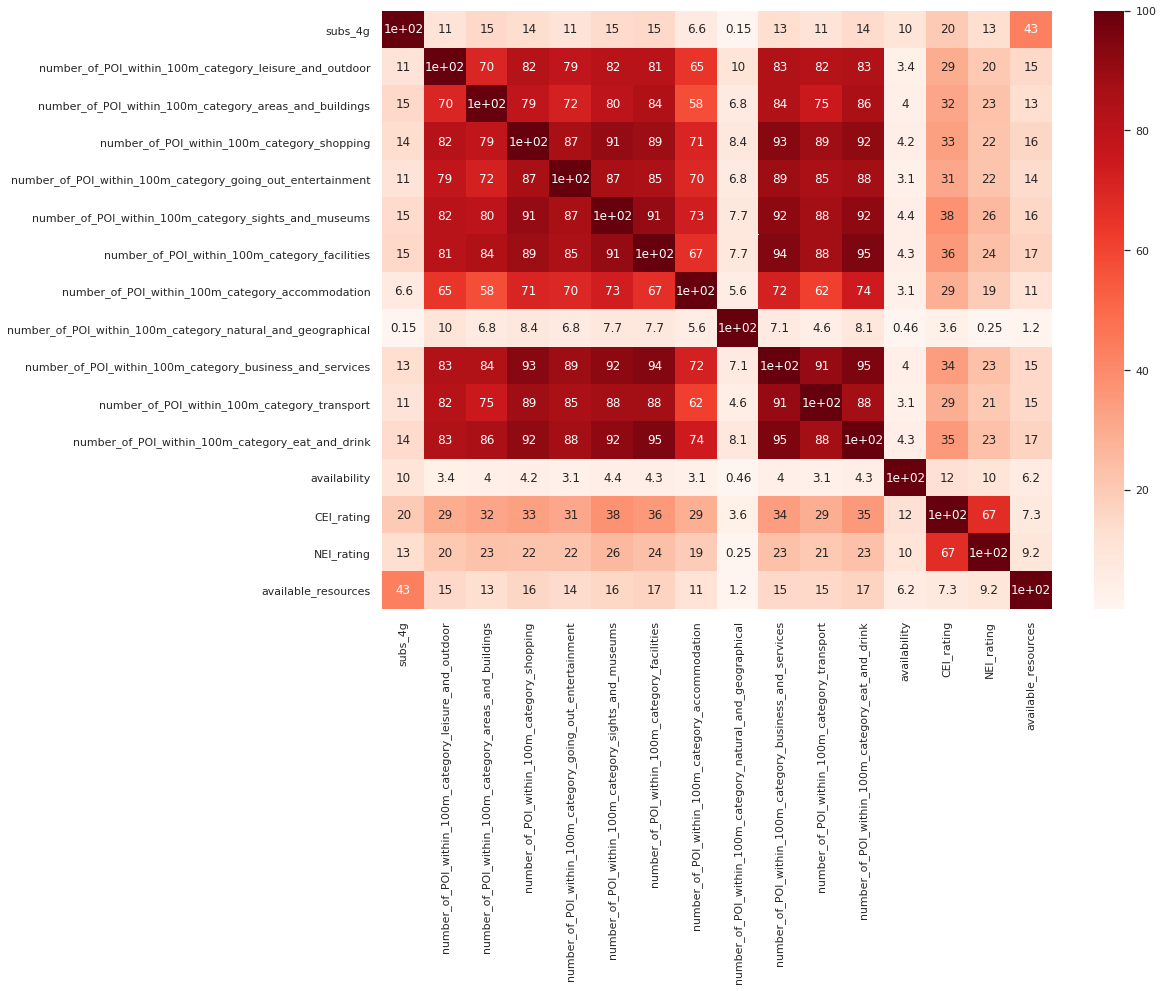

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 11))

import seaborn as sb
corr = iudf.corr()*100
sb.heatmap(corr, cmap="Reds", annot=True)

sb.set(font_scale=1)

In [30]:
X           = iudf.drop(['subs_4g','kecamatan'], axis=1)
y           = iudf[['subs_4g']]
#y           = np.y['subs_4g']
model       = catboost.CatboostRegressor().fit(X, y)
explainer   = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values, max_display=15)

NameError: name 'iudf' is not defined

In [9]:
from numpy import absolute
model       = xgb.XGBRegressor().fit(X, y)
cv          = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores      = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
scores      = absolute(scores)
print('Mean r2: %.1f (%.1f)' % (scores.mean(), scores.std()))

Mean r2: 0.8 (0.0)


In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
model = RandomForestRegressor()
model.fit(X, y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor()

In [22]:
from sklearn.metrics import accuracy_score

sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [23]:
y.median()

subs_4g    1992.0
dtype: float64

In [26]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

_________________________________________________

In [27]:
model = RandomForestRegressor()
model.fit(X, y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor()

In [29]:
from catboost import CatBoostRegressor
catboost = CatBoostRegressor()
catboost.fit(X, y)

Learning rate set to 0.053119
0:	learn: 7153.5871313	total: 62.7ms	remaining: 1m 2s
1:	learn: 6907.6569332	total: 70.7ms	remaining: 35.3s
2:	learn: 6673.9959623	total: 85.5ms	remaining: 28.4s
3:	learn: 6455.0774529	total: 97.9ms	remaining: 24.4s
4:	learn: 6238.0192221	total: 112ms	remaining: 22.2s
5:	learn: 6040.8574871	total: 124ms	remaining: 20.5s
6:	learn: 5860.8782097	total: 131ms	remaining: 18.6s
7:	learn: 5688.3951841	total: 140ms	remaining: 17.3s
8:	learn: 5517.3036922	total: 152ms	remaining: 16.7s
9:	learn: 5360.2516731	total: 163ms	remaining: 16.2s
10:	learn: 5218.8801510	total: 175ms	remaining: 15.7s
11:	learn: 5074.3653754	total: 187ms	remaining: 15.4s
12:	learn: 4944.0684622	total: 195ms	remaining: 14.8s
13:	learn: 4819.9288717	total: 209ms	remaining: 14.7s
14:	learn: 4695.9435407	total: 226ms	remaining: 14.8s
15:	learn: 4578.2299777	total: 239ms	remaining: 14.7s
16:	learn: 4469.8766253	total: 252ms	remaining: 14.6s
17:	learn: 4379.1156788	total: 266ms	remaining: 14.5s
18:	

157:	learn: 2251.2797887	total: 1.86s	remaining: 9.9s
158:	learn: 2248.8968724	total: 1.87s	remaining: 9.91s
159:	learn: 2246.6028767	total: 1.89s	remaining: 9.93s
160:	learn: 2243.6476609	total: 1.91s	remaining: 9.94s
161:	learn: 2239.5886664	total: 1.92s	remaining: 9.95s
162:	learn: 2238.6200097	total: 1.93s	remaining: 9.91s
163:	learn: 2233.6901321	total: 1.94s	remaining: 9.89s
164:	learn: 2230.4337607	total: 1.95s	remaining: 9.85s
165:	learn: 2227.6023985	total: 1.95s	remaining: 9.8s
166:	learn: 2222.8447715	total: 1.96s	remaining: 9.76s
167:	learn: 2219.7147629	total: 1.96s	remaining: 9.72s
168:	learn: 2217.1235651	total: 1.97s	remaining: 9.69s
169:	learn: 2214.0035867	total: 1.98s	remaining: 9.65s
170:	learn: 2211.9574533	total: 1.98s	remaining: 9.61s
171:	learn: 2208.6389822	total: 1.99s	remaining: 9.57s
172:	learn: 2207.4020677	total: 1.99s	remaining: 9.53s
173:	learn: 2205.5283107	total: 2s	remaining: 9.49s
174:	learn: 2204.3276057	total: 2s	remaining: 9.45s
175:	learn: 2200.6

311:	learn: 1903.4891609	total: 3.7s	remaining: 8.16s
312:	learn: 1903.3697260	total: 3.71s	remaining: 8.15s
313:	learn: 1901.1533278	total: 3.72s	remaining: 8.14s
314:	learn: 1899.7669921	total: 3.73s	remaining: 8.12s
315:	learn: 1895.9001082	total: 3.75s	remaining: 8.12s
316:	learn: 1895.7841748	total: 3.77s	remaining: 8.11s
317:	learn: 1892.2372406	total: 3.78s	remaining: 8.11s
318:	learn: 1889.4384619	total: 3.79s	remaining: 8.1s
319:	learn: 1889.3278546	total: 3.8s	remaining: 8.08s
320:	learn: 1889.1641305	total: 3.82s	remaining: 8.07s
321:	learn: 1885.6167245	total: 3.83s	remaining: 8.06s
322:	learn: 1883.0756779	total: 3.84s	remaining: 8.04s
323:	learn: 1880.5188243	total: 3.85s	remaining: 8.03s
324:	learn: 1879.2124170	total: 3.86s	remaining: 8.01s
325:	learn: 1879.0431385	total: 3.87s	remaining: 8s
326:	learn: 1877.0426128	total: 3.88s	remaining: 7.97s
327:	learn: 1875.1681952	total: 3.89s	remaining: 7.97s
328:	learn: 1874.1040659	total: 3.9s	remaining: 7.96s
329:	learn: 1872.

468:	learn: 1630.2808485	total: 5.52s	remaining: 6.25s
469:	learn: 1628.8048124	total: 5.54s	remaining: 6.25s
470:	learn: 1628.0072457	total: 5.55s	remaining: 6.24s
471:	learn: 1626.4288088	total: 5.56s	remaining: 6.22s
472:	learn: 1625.0944769	total: 5.57s	remaining: 6.2s
473:	learn: 1622.2178825	total: 5.57s	remaining: 6.18s
474:	learn: 1621.8474417	total: 5.58s	remaining: 6.17s
475:	learn: 1620.0876819	total: 5.58s	remaining: 6.15s
476:	learn: 1618.3202682	total: 5.59s	remaining: 6.13s
477:	learn: 1618.1214737	total: 5.6s	remaining: 6.11s
478:	learn: 1616.7142491	total: 5.6s	remaining: 6.09s
479:	learn: 1614.2344888	total: 5.61s	remaining: 6.07s
480:	learn: 1613.3424796	total: 5.61s	remaining: 6.06s
481:	learn: 1612.9489187	total: 5.62s	remaining: 6.04s
482:	learn: 1611.4164168	total: 5.62s	remaining: 6.02s
483:	learn: 1609.5161206	total: 5.63s	remaining: 6s
484:	learn: 1607.8121157	total: 5.63s	remaining: 5.98s
485:	learn: 1606.3671178	total: 5.64s	remaining: 5.97s
486:	learn: 1605

627:	learn: 1439.4185201	total: 7.15s	remaining: 4.24s
628:	learn: 1437.9103443	total: 7.16s	remaining: 4.22s
629:	learn: 1436.7849103	total: 7.17s	remaining: 4.21s
630:	learn: 1435.6108174	total: 7.17s	remaining: 4.19s
631:	learn: 1434.0779935	total: 7.18s	remaining: 4.18s
632:	learn: 1432.9427265	total: 7.18s	remaining: 4.16s
633:	learn: 1431.4882978	total: 7.19s	remaining: 4.15s
634:	learn: 1431.0622491	total: 7.19s	remaining: 4.13s
635:	learn: 1430.2319960	total: 7.2s	remaining: 4.12s
636:	learn: 1429.2052459	total: 7.21s	remaining: 4.11s
637:	learn: 1428.3296307	total: 7.21s	remaining: 4.09s
638:	learn: 1427.1362808	total: 7.22s	remaining: 4.08s
639:	learn: 1426.0442852	total: 7.22s	remaining: 4.06s
640:	learn: 1425.7651291	total: 7.23s	remaining: 4.05s
641:	learn: 1424.3698127	total: 7.23s	remaining: 4.03s
642:	learn: 1423.4989569	total: 7.24s	remaining: 4.02s
643:	learn: 1422.4046128	total: 7.25s	remaining: 4.01s
644:	learn: 1419.9680912	total: 7.25s	remaining: 3.99s
645:	learn:

777:	learn: 1292.8551152	total: 8.8s	remaining: 2.51s
778:	learn: 1292.3362513	total: 8.81s	remaining: 2.5s
779:	learn: 1291.7023829	total: 8.83s	remaining: 2.49s
780:	learn: 1290.5403635	total: 8.84s	remaining: 2.48s
781:	learn: 1289.8233964	total: 8.85s	remaining: 2.47s
782:	learn: 1288.9535394	total: 8.86s	remaining: 2.46s
783:	learn: 1288.2079712	total: 8.87s	remaining: 2.44s
784:	learn: 1286.0848230	total: 8.88s	remaining: 2.43s
785:	learn: 1285.0473634	total: 8.89s	remaining: 2.42s
786:	learn: 1284.2090123	total: 8.9s	remaining: 2.41s
787:	learn: 1283.2078799	total: 8.91s	remaining: 2.4s
788:	learn: 1281.7945189	total: 8.93s	remaining: 2.39s
789:	learn: 1280.5486352	total: 8.94s	remaining: 2.38s
790:	learn: 1279.8288382	total: 8.95s	remaining: 2.37s
791:	learn: 1278.4082619	total: 8.96s	remaining: 2.35s
792:	learn: 1277.5583451	total: 8.98s	remaining: 2.34s
793:	learn: 1276.6335450	total: 8.98s	remaining: 2.33s
794:	learn: 1275.8134679	total: 8.99s	remaining: 2.32s
795:	learn: 12

939:	learn: 1173.3774986	total: 10.4s	remaining: 665ms
940:	learn: 1173.1376822	total: 10.4s	remaining: 655ms
941:	learn: 1172.3023858	total: 10.4s	remaining: 643ms
942:	learn: 1171.5669976	total: 10.5s	remaining: 632ms
943:	learn: 1170.9793399	total: 10.5s	remaining: 621ms
944:	learn: 1169.4818343	total: 10.5s	remaining: 610ms
945:	learn: 1168.9334401	total: 10.5s	remaining: 599ms
946:	learn: 1168.3546645	total: 10.5s	remaining: 588ms
947:	learn: 1168.0100574	total: 10.5s	remaining: 577ms
948:	learn: 1166.8886762	total: 10.5s	remaining: 566ms
949:	learn: 1166.2098775	total: 10.6s	remaining: 555ms
950:	learn: 1165.7466737	total: 10.6s	remaining: 544ms
951:	learn: 1164.5135900	total: 10.6s	remaining: 533ms
952:	learn: 1163.8776553	total: 10.6s	remaining: 522ms
953:	learn: 1163.0041329	total: 10.6s	remaining: 511ms
954:	learn: 1162.3340896	total: 10.6s	remaining: 500ms
955:	learn: 1161.5042204	total: 10.6s	remaining: 489ms
956:	learn: 1160.6749725	total: 10.6s	remaining: 478ms
957:	learn

# PyCaret :

In [10]:
from pycaret.regression import *

In [11]:
iudf.columns

Index(['kecamatan', 'subs_4g',
       'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_within_100m_category_shopping',
       'number_of_POI_within_100m_category_going_out_entertainment',
       'number_of_POI_within_100m_category_sights_and_museums',
       'number_of_POI_within_100m_category_facilities',
       'number_of_POI_within_100m_category_accommodation',
       'number_of_POI_within_100m_category_natural_and_geographical',
       'number_of_POI_within_100m_category_business_and_services',
       'number_of_POI_within_100m_category_transport',
       'number_of_POI_within_100m_category_eat_and_drink', 'availability',
       'CEI_rating', 'NEI_rating', 'available_resources'],
      dtype='object')

In [12]:
iudf = iudf[iudf_feature]
iudf.head()

,subs_4g,number_of_POI_within_100m_category_leisure_and_outdoor,number_of_POI_within_100m_category_areas_and_buildings,number_of_POI_within_100m_category_shopping,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_natural_and_geographical,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,number_of_POI_within_100m_category_eat_and_drink,availability,CEI_rating,NEI_rating,available_resources
0,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,3.901838,3.327989,90.000000
1,13028.0,4.0,1.0,466.0,5.0,39.0,110.0,11.0,0.0,160.0,4.0,73.0,100.000000,4.674971,3.584661,106.956522
2,6384.0,0.0,0.0,43.0,0.0,1.0,12.0,0.0,0.0,13.0,0.0,12.0,99.987374,4.064341,3.067871,113.636364
3,24350.0,3.0,5.0,251.0,8.0,20.0,136.0,12.0,0.0,157.0,8.0,163.0,100.000000,NaN,NaN,105.156250
4,6697.0,1.0,0.0,45.0,1.0,7.0,22.0,0.0,0.0,28.0,0.0,28.0,100.000000,4.041881,3.295456,97.142857


In [13]:
iudf.isnull().sum()

subs_4g                                                         0
number_of_POI_within_100m_category_leisure_and_outdoor         56
number_of_POI_within_100m_category_areas_and_buildings         56
number_of_POI_within_100m_category_shopping                    56
number_of_POI_within_100m_category_going_out_entertainment     56
number_of_POI_within_100m_category_sights_and_museums          56
number_of_POI_within_100m_category_facilities                  56
number_of_POI_within_100m_category_accommodation               56
number_of_POI_within_100m_category_natural_and_geographical    56
number_of_POI_within_100m_category_business_and_services       56
number_of_POI_within_100m_category_transport                   56
number_of_POI_within_100m_category_eat_and_drink               56
availability                                                   25
CEI_rating                                                     13
NEI_rating                                                     30
available_

In [14]:
iudf.describe()

,subs_4g,number_of_POI_within_100m_category_leisure_and_outdoor,number_of_POI_within_100m_category_areas_and_buildings,number_of_POI_within_100m_category_shopping,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_natural_and_geographical,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,number_of_POI_within_100m_category_eat_and_drink,availability,CEI_rating,NEI_rating,available_resources
count,5767.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5742.000000,5754.000000,5737.000000,5754.000000
mean,4495.652506,0.431973,0.884959,48.748030,1.215549,4.233409,16.116267,1.858694,0.003502,25.475749,1.244791,21.838907,99.420728,3.827402,3.211241,111.421194
std,7554.341553,1.685693,2.860548,177.586553,5.638709,12.160528,49.117987,8.639024,0.061973,92.245770,5.727767,74.892733,3.008747,0.313880,0.174250,34.202891
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.250000,2.883370,2.496092,6.300000
25%,846.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.986322,3.613703,3.106362,90.000000
50%,1981.000000,0.000000,0.000000,3.000000,0.000000,1.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,100.000000,3.799091,3.226686,106.666667
75%,4454.500000,0.000000,1.000000,19.000000,0.000000,3.000000,9.000000,0.000000,0.000000,10.000000,0.000000,10.000000,100.000000,4.015372,3.337909,128.181818
max,76101.000000,37.000000,52.000000,5432.000000,132.000000,170.000000,1038.000000,202.000000,2.000000,2180.000000,114.000000,1325.000000,100.000000,5.355852,3.669218,330.000000


In [15]:
iudf = iudf.dropna(how='any')

In [16]:
iudf=iudf.astype(int)

In [17]:
reg = setup(data = iudf, 
             target = 'subs_4g',
             numeric_imputation = 'mean',
             categorical_features = []  , 
             ignore_features = [],
             normalize = True,
             silent = True)

,Description,Value
0,session_id,5163
1,Target,subs_4g
2,Original Data,"(5649, 16)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3954, 18)"


In [18]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1810,1.271e+07,3527,0.7701,0.6804,0.7707,2.17
gbr,Gradient Boosting Regressor,1867,1.312e+07,3589,0.7641,0.7273,0.88,0.054
et,Extra Trees Regressor,1919,1.327e+07,3609,0.7627,0.7263,0.8275,0.134
rf,Random Forest Regressor,1895,1.365e+07,3657,0.7551,0.6904,0.777,0.149
lightgbm,Light Gradient Boosting Machine,1902,1.442e+07,3752,0.7443,0.6897,0.7919,0.132
xgboost,Extreme Gradient Boosting,1944,1.486e+07,3818,0.7328,0.6887,0.7573,52.81
knn,K Neighbors Regressor,1978,1.544e+07,3883,0.7249,0.7414,0.7796,0.024
llar,Lasso Least Angle Regression,2269,1.851e+07,4247,0.6645,0.9753,1.587,0.318
br,Bayesian Ridge,2253,1.918e+07,4313,0.653,0.9516,1.497,0.013
lasso,Lasso Regression,2255,1.925e+07,4320,0.6517,0.9512,1.494,0.142


In [19]:
cb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1684,1.153e+07,3396,0.8375,0.6979,0.8183
1,1863,1.229e+07,3505,0.7699,0.6949,0.7863
2,1606,8.951e+06,2992,0.8263,0.6698,0.6991
3,1829,1.221e+07,3495,0.8409,0.681,0.7811
4,2335,2.409e+07,4908,0.7495,0.6678,0.7395
5,1776,1.31e+07,3619,0.7684,0.6618,0.769
6,2006,1.403e+07,3746,0.6657,0.7018,0.8215
7,1560,8.593e+06,2931,0.8168,0.6412,0.6876
8,1716,1.168e+07,3418,0.7208,0.6768,0.7996
9,1732,1.061e+07,3257,0.7056,0.7105,0.8046


In [20]:
tuned_cb = tune_model(cb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1700,1.146e+07,3385,0.8385,0.7389,0.9102
1,1844,1.151e+07,3392,0.7845,0.7166,0.857
2,1709,9.545e+06,3090,0.8148,0.73,0.8602
3,1899,1.249e+07,3534,0.8374,0.7624,0.9641
4,2422,2.482e+07,4982,0.7418,0.7451,0.9044
5,1828,1.345e+07,3668,0.7621,0.7078,0.8813
6,1933,1.288e+07,3589,0.6932,0.7446,0.9064
7,1584,8.523e+06,2919,0.8183,0.6902,0.8047
8,1697,1.2e+07,3464,0.7131,0.7425,0.9489
9,1762,9.825e+06,3135,0.7273,0.7562,0.9116


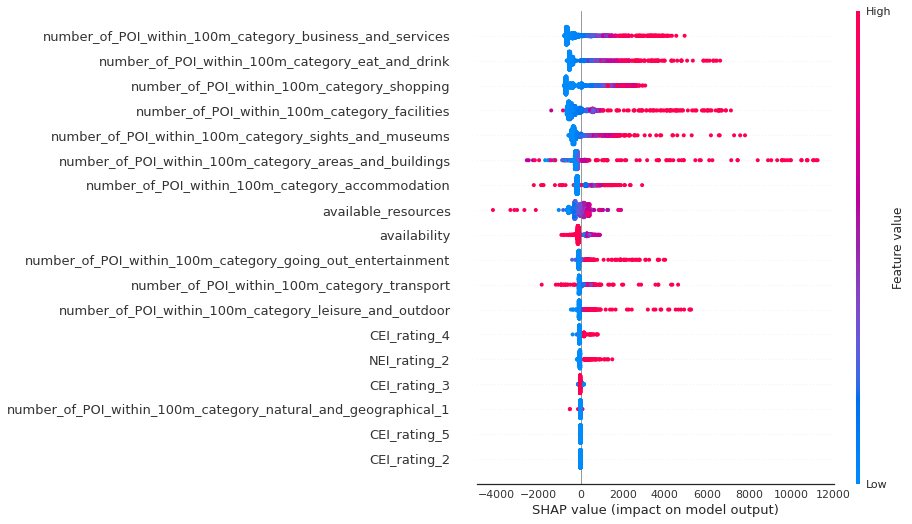

In [21]:
interpret_model(tuned_cb)

In [23]:
predictions = predict_model(tuned_cb, data = iudf)
iudf= predictions['Label']
iudf.to_csv('IUDF_5G.csv',index=False)
iudf.head()

0      722.414141
1    16373.693006
2     5314.141494
4     6908.693588
5     2070.101313
Name: Label, dtype: float64

In [24]:
iudf.columns

AttributeError: 'Series' object has no attribute 'columns'

# Full Features :


In [3]:
df_POI = spark.sql("""select 
                        b.kecamatan,
                        sum(b.subs_4g) as subs_4g,
                        sum(b.fea_outlet_under_100m_to_leisure_and_outdoor) fea_outlet_under_100m_to_leisure_and_outdoor,
                        sum(b.fea_outlet_under_100m_to_areas_and_buildings) fea_outlet_under_100m_to_areas_and_buildings,
                        sum(b.fea_outlet_under_100m_to_shopping) fea_outlet_under_100m_to_shopping,
                        sum(b.fea_outlet_under_100m_to_going_out_entertainment) fea_outlet_under_100m_to_going_out_entertainment,
                        sum(b.fea_outlet_under_100m_to_sights_and_museums) fea_outlet_under_100m_to_sights_and_museums,
                        sum(b.fea_outlet_under_100m_to_facilities) fea_outlet_under_100m_to_facilities,
                        sum(b.fea_outlet_under_100m_to_accommodation) fea_outlet_under_100m_to_accommodation,
                        sum(b.fea_outlet_under_100m_to_natural_and_geographical) fea_outlet_under_100m_to_natural_and_geographical,
                        sum(b.fea_outlet_under_100m_to_business_and_services) fea_outlet_under_100m_to_business_and_services,
                        sum(b.fea_outlet_under_100m_to_transport) fea_outlet_under_100m_to_transport,            
                        sum(b.fea_outlet_under_100m_to_eat_and_drink) fea_outlet_under_100m_to_eat_and_drink,
                        avg(b.fea_min_distance_outlet_to_leisure_and_outdoor) fea_min_distance_outlet_to_leisure_and_outdoor,
                        avg(b.fea_min_distance_outlet_to_areas_and_buildings) fea_min_distance_outlet_to_areas_and_buildings,
                        avg(b.fea_min_distance_outlet_to_shopping) fea_min_distance_outlet_to_shopping,
                        avg(b.fea_min_distance_outlet_to_going_out_entertainment) fea_min_distance_outlet_to_going_out_entertainment,
                        avg(b.fea_min_distance_outlet_to_sights_and_museums) fea_min_distance_outlet_to_sights_and_museums,
                        avg(b.fea_min_distance_outlet_to_facilities) fea_min_distance_outlet_to_facilities,
                        avg(b.fea_min_distance_outlet_to_accommodation) fea_min_distance_outlet_to_accommodation,
                        avg(b.fea_min_distance_outlet_to_natural_and_geographical) fea_min_distance_outlet_to_natural_and_geographical,
                        avg(b.fea_min_distance_outlet_to_business_and_services) fea_min_distance_outlet_to_business_and_services,
                        avg(b.fea_min_distance_outlet_to_transport) fea_min_distance_outlet_to_transport,
                        avg(b.fea_min_distance_outlet_to_eat_and_drink) fea_min_distance_outlet_to_eat_and_drink,
                        avg(b.availability) availability,
                        avg(b.cei_rating) cei_rating,
                        avg(b.nei_rating) nei_rating,
                        avg(b.bandwidth) bandwidth
                    from
                        mkt_hq_v.sample_site_for_outlet_v2 b 
                    where 
                        b.subs_4g > 100
                     group by kecamatan
""").toPandas()
df_POI.head()

,kecamatan,subs_4g,fea_outlet_under_100m_to_leisure_and_outdoor,fea_outlet_under_100m_to_areas_and_buildings,fea_outlet_under_100m_to_shopping,fea_outlet_under_100m_to_going_out_entertainment,fea_outlet_under_100m_to_sights_and_museums,fea_outlet_under_100m_to_facilities,fea_outlet_under_100m_to_accommodation,fea_outlet_under_100m_to_natural_and_geographical,...,fea_min_distance_outlet_to_facilities,fea_min_distance_outlet_to_accommodation,fea_min_distance_outlet_to_natural_and_geographical,fea_min_distance_outlet_to_business_and_services,fea_min_distance_outlet_to_transport,fea_min_distance_outlet_to_eat_and_drink,availability,cei_rating,nei_rating,bandwidth
0,LONGKIB,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,258.890000,15365.900000,0.000000,5528.380000,0.000000,1288.390000,100.000000,3.901838,3.327989,90.000000
1,BAITURRAHMAN,13028.0,4.0,1.0,466.0,5.0,39.0,110.0,11.0,0.0,...,48.330000,188.214783,0.000000,41.703478,321.136522,75.632174,100.000000,4.674971,3.584661,106.956522
2,TANJUNGANOM,6384.0,0.0,0.0,43.0,0.0,1.0,12.0,0.0,0.0,...,167.148182,1391.809091,3770.685455,252.965455,2348.627273,200.818182,99.987374,4.064341,3.067871,113.636364
3,PADANG UTARA,24350.0,3.0,5.0,251.0,8.0,20.0,136.0,12.0,0.0,...,57.321562,164.410313,2521.945625,58.221875,177.319687,64.180000,100.000000,NaN,NaN,105.156250
4,AMBARAWA,6697.0,1.0,0.0,45.0,1.0,7.0,22.0,0.0,0.0,...,120.708571,699.740000,3164.219286,115.232143,1330.619286,145.575714,100.000000,4.041881,3.295456,97.142857


In [4]:
df_POI.columns

Index(['kecamatan', 'subs_4g', 'fea_outlet_under_100m_to_leisure_and_outdoor',
       'fea_outlet_under_100m_to_areas_and_buildings',
       'fea_outlet_under_100m_to_shopping',
       'fea_outlet_under_100m_to_going_out_entertainment',
       'fea_outlet_under_100m_to_sights_and_museums',
       'fea_outlet_under_100m_to_facilities',
       'fea_outlet_under_100m_to_accommodation',
       'fea_outlet_under_100m_to_natural_and_geographical',
       'fea_outlet_under_100m_to_business_and_services',
       'fea_outlet_under_100m_to_transport',
       'fea_outlet_under_100m_to_eat_and_drink',
       'fea_min_distance_outlet_to_leisure_and_outdoor',
       'fea_min_distance_outlet_to_areas_and_buildings',
       'fea_min_distance_outlet_to_shopping',
       'fea_min_distance_outlet_to_going_out_entertainment',
       'fea_min_distance_outlet_to_sights_and_museums',
       'fea_min_distance_outlet_to_facilities',
       'fea_min_distance_outlet_to_accommodation',
       'fea_min_distance_ou

In [8]:
df_POI.columns = ['kecamatan', 'subs_4g', 'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_within_100m_category_shopping',
       'number_of_POI_within_100m_category_going_out_entertainment',
       'number_of_POI_within_100m_category_sights_and_museums',
       'number_of_POI_within_100m_category_facilities',
       'number_of_POI_within_100m_category_accommodation',
       'number_of_POI_within_100m_category_natural_and_geographical',
       'number_of_POI_within_100m_category_business_and_services',
       'number_of_POI_within_100m_category_transport',
       'number_of_POI_within_100m_category_eat_and_drink',
       'min_distance_from_site_to_POI_catefgory_leisure_and_outdoor',
       'min_distance_from_site_to_POI_catefgory_areas_and_buildings',
       'min_distance_from_site_to_POI_catefgory_shopping',
       'min_distance_from_site_to_POI_catefgory_going_out_entertainment',
       'min_distance_from_site_to_POI_catefgory_sights_and_museums',
       'min_distance_from_site_to_POI_catefgory_facilities',
       'min_distance_from_site_to_POI_catefgory_accommodation',
       'min_distance_from_site_to_POI_catefgory_natural_and_geographical',
       'min_distance_from_site_to_POI_catefgory_business_and_services',
       'min_distance_from_site_to_POI_catefgory_transport',
       'min_distance_from_site_to_POI_catefgory_eat_and_drink', 'availability',
       'cei_rating', 'nei_rating', 'available_network_resources']

POI_feature = ['subs_4g', 'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_within_100m_category_shopping',
       'number_of_POI_within_100m_category_going_out_entertainment',
       'number_of_POI_within_100m_category_sights_and_museums',
       'number_of_POI_within_100m_category_facilities',
       'number_of_POI_within_100m_category_accommodation',
       'number_of_POI_within_100m_category_natural_and_geographical',
       'number_of_POI_within_100m_category_business_and_services',
       'number_of_POI_within_100m_category_transport',
       'number_of_POI_within_100m_category_eat_and_drink',
       'min_distance_from_site_to_POI_catefgory_leisure_and_outdoor',
       'min_distance_from_site_to_POI_catefgory_areas_and_buildings',
       'min_distance_from_site_to_POI_catefgory_shopping',
       'min_distance_from_site_to_POI_catefgory_going_out_entertainment',
       'min_distance_from_site_to_POI_catefgory_sights_and_museums',
       'min_distance_from_site_to_POI_catefgory_facilities',
       'min_distance_from_site_to_POI_catefgory_accommodation',
       'min_distance_from_site_to_POI_catefgory_natural_and_geographical',
       'min_distance_from_site_to_POI_catefgory_business_and_services',
       'min_distance_from_site_to_POI_catefgory_transport',
       'min_distance_from_site_to_POI_catefgory_eat_and_drink', 'availability',
       'cei_rating', 'nei_rating', 'available_network_resources']

for cols in POI_feature:
    df_POI[cols]=df_POI[cols].astype(float)

df_POI.head()

,kecamatan,subs_4g,number_of_POI_within_100m_category_leisure_and_outdoor,number_of_POI_within_100m_category_areas_and_buildings,number_of_POI_within_100m_category_shopping,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_natural_and_geographical,...,min_distance_from_site_to_POI_catefgory_facilities,min_distance_from_site_to_POI_catefgory_accommodation,min_distance_from_site_to_POI_catefgory_natural_and_geographical,min_distance_from_site_to_POI_catefgory_business_and_services,min_distance_from_site_to_POI_catefgory_transport,min_distance_from_site_to_POI_catefgory_eat_and_drink,availability,cei_rating,nei_rating,available_network_resources
0,LONGKIB,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,258.890000,15365.900000,0.000000,5528.380000,0.000000,1288.390000,100.000000,3.901838,3.327989,90.000000
1,BAITURRAHMAN,13028.0,4.0,1.0,466.0,5.0,39.0,110.0,11.0,0.0,...,48.330000,188.214783,0.000000,41.703478,321.136522,75.632174,100.000000,4.674971,3.584661,106.956522
2,TANJUNGANOM,6384.0,0.0,0.0,43.0,0.0,1.0,12.0,0.0,0.0,...,167.148182,1391.809091,3770.685455,252.965455,2348.627273,200.818182,99.987374,4.064341,3.067871,113.636364
3,PADANG UTARA,24350.0,3.0,5.0,251.0,8.0,20.0,136.0,12.0,0.0,...,57.321562,164.410313,2521.945625,58.221875,177.319687,64.180000,100.000000,NaN,NaN,105.156250
4,AMBARAWA,6697.0,1.0,0.0,45.0,1.0,7.0,22.0,0.0,0.0,...,120.708571,699.740000,3164.219286,115.232143,1330.619286,145.575714,100.000000,4.041881,3.295456,97.142857


In [9]:
df_POI.corr()['subs_4g']*100

subs_4g                                                             100.000000
number_of_POI_within_100m_category_leisure_and_outdoor               62.596938
number_of_POI_within_100m_category_areas_and_buildings               75.083101
number_of_POI_within_100m_category_shopping                          70.457254
number_of_POI_within_100m_category_going_out_entertainment           64.252305
number_of_POI_within_100m_category_sights_and_museums                77.292822
number_of_POI_within_100m_category_facilities                        76.583594
number_of_POI_within_100m_category_accommodation                     52.127635
number_of_POI_within_100m_category_natural_and_geographical           5.516998
number_of_POI_within_100m_category_business_and_services             73.619746
number_of_POI_within_100m_category_transport                         63.944526
number_of_POI_within_100m_category_eat_and_drink                     77.115888
min_distance_from_site_to_POI_catefgory_leisure_and_

In [12]:
df_POI.isnull().sum()

kecamatan                                                           0
subs_4g                                                             0
number_of_POI_within_100m_category_leisure_and_outdoor              0
number_of_POI_within_100m_category_areas_and_buildings              0
number_of_POI_within_100m_category_shopping                         0
number_of_POI_within_100m_category_going_out_entertainment          0
number_of_POI_within_100m_category_sights_and_museums               0
number_of_POI_within_100m_category_facilities                       0
number_of_POI_within_100m_category_accommodation                    0
number_of_POI_within_100m_category_natural_and_geographical         0
number_of_POI_within_100m_category_business_and_services            0
number_of_POI_within_100m_category_transport                        0
number_of_POI_within_100m_category_eat_and_drink                    0
min_distance_from_site_to_POI_catefgory_leisure_and_outdoor         0
min_distance_from_si

In [11]:
df_POI = df_POI.dropna(how='any')

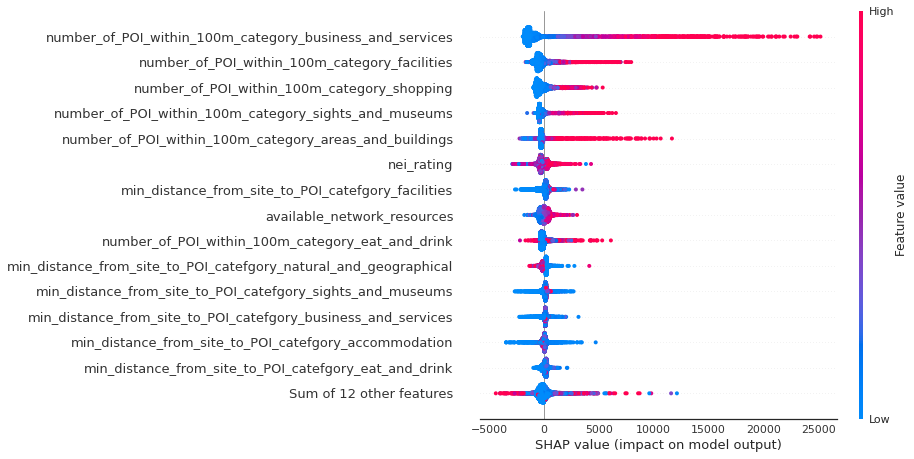

In [14]:
X           = df_POI.drop(['subs_4g','kecamatan'], axis=1)
y           = df_POI[['subs_4g']]
#y           = np.y['subs_4g']
model       = xgb.XGBRegressor().fit(X, y)
explainer   = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values, max_display=15)

In [15]:
from numpy import absolute
model       = xgb.XGBRegressor().fit(X, y)
cv          = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores      = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
scores      = absolute(scores)
print('Mean r2: %.1f (%.1f)' % (scores.mean(), scores.std()))

KeyboardInterrupt: 

In [16]:
df_=df_POI.astype(int)

ValueError: invalid literal for int() with base 10: 'LONGKIB'

In [ ]:
reg = setup(data = iudf, 
             target = 'subs_4g',
             numeric_imputation = 'mean',
             categorical_features = []  , 
             ignore_features = [],
             normalize = True,
             silent = True)

In [ ]:
compare_models()

In [ ]:
cb = create_model('catboost')

In [ ]:
tuned_cb = tune_model(cb)

In [ ]:
interpret_model(tuned_cb)

In [ ]:
predictions = predict_model(tuned_cb, data = iudf)
iudf= predictions['Label']
iudf.to_csv('IUDF_5G.csv',index=False)
iudf.head()